# Modelo motor retardado 
### Generado en matlab

Creamos la función del motor.

In [1]:
#Importamos las librerias necesarias
import numpy as np
import matplotlib.pyplot as plt
import time as tm
                      #Esta función ya incluye la aprox.de Pade.
def model_m(x,u,Tl):  #Se agrega Tl para convergencia con el codigo original, pero no se utiliza.
    x1=x[0] #Corriente
    x2=x[1] #Posición
    x3=x[2] #Velocidad
    x4=x[3] #Estado  tf Pade
    x5=x[4] ##Estado tf Pade
    # Equivalente A*x + B*u
    x1d=   u-(1.913865248943986e+03)*x1-(6.561037830776859e+05)*x2-(3.890761932491459e+06)*x3-(7.735735099008263e+06)*x4
    x2d=   x1
    x3d=   x2
    x4d=   x3
    x5d=   x4
    return np.array([x1d, x2d, x3d, x4d, x5d]) #Retornamos las variables de estado

Configuración de la simulación.

In [2]:
h = 0.001                         # Time step
t_sim2 = np.arange(0, 5, h)       # Simulation time array

x0 = np.array([0, 0, 0, 0, 0])    # Initial conditions
u =20* np.ones(len(t_sim2))       # Voltaje  input 
Tl = np.zeros_like(t_sim2)        # Zero external torque input

x_sim2 = np.zeros((len(t_sim2), len(x0)))  
x_sim2[0] = x0                    # Initials conditions

#Debido a que matriz C de matlab solo indica 3 salidas, el vector donde se guradaran las 
#salidas y, debe ser congruente con estas diemensiones.
y=np.zeros((len(t_sim2), 3))
y[0]=np.array([0, 0, 0])

#Declaramos los valores que integran a la matriz c
a1=5.555555555555556e+03;	a2=-2.050170339761250e+04;	a3=-1.032311294765839e+04
a4=1.539795592286501e+05
b3=3.833792470156106e+07;	b4=-2.300275482093664e+08;	b5=4.600550964187328e+08
c2=3.833792470156106e+07;	c3=-2.300275482093664e+08;	c4=4.600550964187328e+08

Resolvemos con RkDP

In [3]:
for i in range(1, len(t_sim2)):
    k1=h*model_m(x_sim2[i-1], u[i-1], Tl[i-1])
    k2=h*model_m(x_sim2[i-1]+ (k1/5), u[i-1],Tl[i-1])
    k3=h*model_m(x_sim2[i-1]+ (3/40)*k1 + (9/40)*k2, u[i-1],Tl[i-1])
    k4=h*model_m(x_sim2[i-1]+ (44/45)*k1 - (56/15)*k2 + (32/9)*k3, u[i-1],Tl[i-1])
    k5=h*model_m(x_sim2[i-1]+ (19372/6561)*k1 - (25360/2187)*k2 +(64448/6561)*k3 - (212/729)*k4, u[i-1],Tl[i-1])
    k6=h*model_m(x_sim2[i-1]+ (9017/3168)*k1 -(355/33)*k2 +(46732/5247)*k3 + (49/176)*k4 - (5103/18656)*k5, u[i-1],Tl[i-1])
    k7=h*model_m(x_sim2[i-1]+ (35/384)*k1 +(500/1113)*k3 +(125/192)*k4 -(2187/6784)*k5 + (11/84)*k6,u[i-1],Tl[i-1])
    x_sim2[i]=x_sim2[i-1]+ (35/384)*k1 + (500/1113)*k3 +(125/192)*k4 -(2187/6784)*k5 +(11/84)*k6
    #Equivalente a Y= C*x +B*U
    y_1= a1*x_sim2[i,0] + a2*x_sim2[i,1]+ a3*x_sim2[i,2] + a4*x_sim2[i,3]
    y_2= b3*x_sim2[i,2] + b4*x_sim2[i,3]+ b5*x_sim2[i,4]
    y_3= c2*x_sim2[i,1] + c3*x_sim2[i,2]+ c4*x_sim2[i,3]
    y[i]= np.array([y_1, y_2, y_3])

Graficamos las respuestas obtenidas

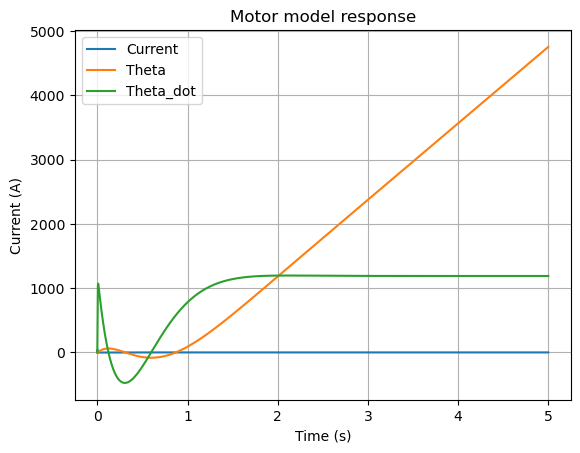

In [4]:
plt.figure()
plt.title('Motor model response')
plt.plot(t_sim2, y[:, 0], label='Current')    # Plot current
plt.plot(t_sim2, y[:, 1], label='Theta')      # Plot angular position
plt.plot(t_sim2, y[:, 2], label='Theta_dot')  # Plot angular velocity
plt.xlabel('Time (s)')
plt.ylabel('Current (A)')
plt.legend()
plt.grid(True)
plt.show()

Salida en modo subplot

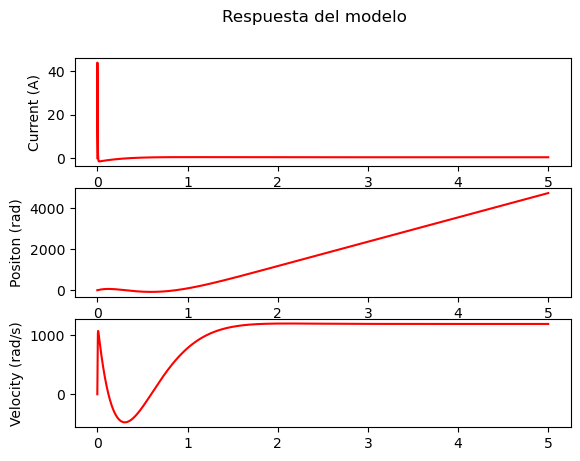

In [5]:
plt.subplot(3,1,1)
plt.plot(t_sim2, y[:, 0], label='Current', color='r')  # Plot current
plt.ylabel('Current (A)')
plt.subplot(3,1,2)
plt.plot(t_sim2, y[:, 1], label='Theta', color='r')  # Plot angular position
plt.ylabel('Positon (rad)')
plt.subplot(3,1,3)
plt.plot(t_sim2, y[:, 2], label='Theta_dot', color='r')  # Plot angular velocity
plt.ylabel('Velocity (rad/s)')
plt.suptitle('Respuesta del modelo')
plt.show()

Guardamos los datos

In [9]:
## from collections import defaultdict
## Q=defaultdict(lambda: np.zeros(4)) #Inicializamos a cero la tabla Q.

Dm=np.array([t_sim2,y[:, 0],y[:, 1],y[:, 2]] )
np.save('Data_m',Dm)